<a href="https://colab.research.google.com/github/matin/garth/blob/main/sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garmin sleep statistics

Start by installing and importing `garth`

In [1]:
%pip install garth >& /dev/null

In [2]:
import garth

Define Garth session location to save and resume sessions

In [3]:
SESSION_PATH = 'drive/MyDrive/garth'

Mount Drive for saving and resuming sessions

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Resume session or login, and make sure to save the garth session for next time

In [5]:
from garth.exc import GarthException
from getpass import getpass
from requests import HTTPError

try:
    garth.resume(SESSION_PATH)
    garth.client.auth_token.refresh()
except (GarthException, HTTPError, FileNotFoundError):
    email = input("Email: ")
    password = getpass("Password: ")
    garth.client.login(email, password)

garth.save(SESSION_PATH)

## Daily sleep quality

List sleep quality for the past 7 days

In [6]:
garth.DailySleep.list(period=7)

[DailySleep(calendar_date=datetime.date(2023, 7, 23), value=73),
 DailySleep(calendar_date=datetime.date(2023, 7, 24), value=70),
 DailySleep(calendar_date=datetime.date(2023, 7, 25), value=87),
 DailySleep(calendar_date=datetime.date(2023, 7, 26), value=59),
 DailySleep(calendar_date=datetime.date(2023, 7, 27), value=67),
 DailySleep(calendar_date=datetime.date(2023, 7, 28), value=69)]

Let's take a look at the sleep quality for the most recent 30 days

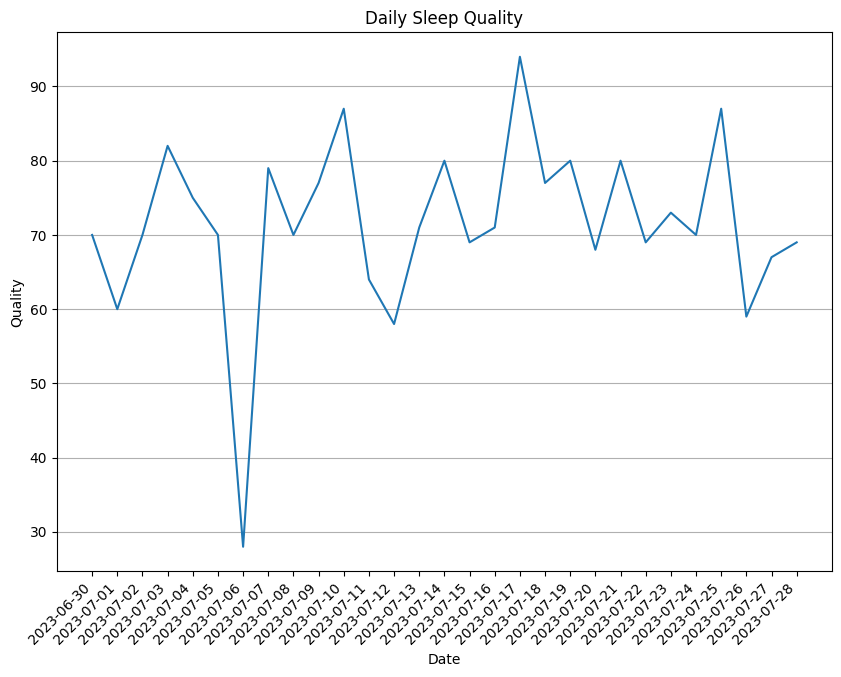

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

daily_sleep = pd.DataFrame(garth.DailySleep.list(period=30))
daily_sleep.set_index('calendar_date', inplace=True)
daily_sleep.plot(kind='line', grid=True, figsize=(10, 7), legend=False)

plt.ylabel('Quality')
plt.xlabel('Date')
plt.title('Daily Sleep Quality')

ax = plt.gca()
ax.grid(axis='x')
plt.xticks(ticks=daily_sleep.index, rotation=45, ha='right')

plt.show()

## Daily sleep data (including stages)

The sleep data includes a tremendous amount of information and can only be fetched by day. Let's fetch every day for the 30 days leading up to yesterday

In [8]:
from datetime import date, timedelta
sleep_data = garth.SleepData.list(date.today() - timedelta(days=1), days=30)

The data is nested, so we'll need to flatten it to be able to get it into a usable DataFrame

In [9]:
import pandas as pd
from pydantic import BaseModel
from typing import List, Union
from dataclasses import is_dataclass

def dataclass_to_dict(dataclass_instance: Union[BaseModel, list]):
    if isinstance(dataclass_instance, list):
        return [dataclass_to_dict(item) for item in dataclass_instance]
    elif is_dataclass(dataclass_instance):
        return {k: dataclass_to_dict(v) for k, v in dataclass_instance.__dict__.items()}
    else:
        return dataclass_instance

def dataclass_to_dataframe(dataclass_list: List[BaseModel]) -> pd.DataFrame:
    dict_list = dataclass_to_dict(dataclass_list)
    return pd.json_normalize(dict_list)

df = dataclass_to_dataframe(sleep_data)

Here's what five days looks like

In [10]:
df.head()

,sleep_movement,__pydantic_initialised__,daily_sleep_dto.id,daily_sleep_dto.user_profile_pk,daily_sleep_dto.calendar_date,daily_sleep_dto.sleep_time_seconds,daily_sleep_dto.nap_time_seconds,daily_sleep_dto.sleep_window_confirmed,daily_sleep_dto.sleep_window_confirmation_type,daily_sleep_dto.sleep_start_timestamp_gmt,...,daily_sleep_dto.highest_sp_o2_value,daily_sleep_dto.average_sp_o2_hr_sleep,daily_sleep_dto.average_respiration_value,daily_sleep_dto.lowest_respiration_value,daily_sleep_dto.highest_respiration_value,daily_sleep_dto.avg_sleep_stress,daily_sleep_dto.age_group,daily_sleep_dto.sleep_score_feedback,daily_sleep_dto.sleep_score_insight,daily_sleep_dto.__pydantic_initialised__
0,"[{'start_gmt': 2023-06-29 03:53:00, 'end_gmt':...",True,1688014380000,2591602,2023-06-29,26460,0,True,enhanced_confirmed_final,2023-06-29 04:53:00+00:00,...,98,48.0,14.0,9.0,17.0,16.0,ADULT,POSITIVE_LONG_AND_DEEP,NONE,True
1,"[{'start_gmt': 2023-06-30 04:26:00, 'end_gmt':...",True,1688102760000,2591602,2023-06-30,19680,0,True,enhanced_confirmed_final,2023-06-30 05:26:00+00:00,...,99,50.0,14.0,5.0,16.0,18.0,ADULT,POSITIVE_DEEP,POSITIVE_EXERCISE,True
2,"[{'start_gmt': 2023-07-01 05:40:00, 'end_gmt':...",True,1688193600000,2591602,2023-07-01,17040,0,True,enhanced_confirmed_final,2023-07-01 06:40:00+00:00,...,96,53.0,15.0,12.0,16.0,18.0,ADULT,NEGATIVE_SHORT_AND_NONRECOVERING,NEGATIVE_HIGHLY_STRESSFUL_DAY,True
3,"[{'start_gmt': 2023-07-02 05:04:00, 'end_gmt':...",True,1688277840000,2591602,2023-07-02,20100,0,True,enhanced_confirmed_final,2023-07-02 06:04:00+00:00,...,96,51.0,15.0,13.0,16.0,14.0,ADULT,NEGATIVE_NOT_ENOUGH_REM,NONE,True
4,"[{'start_gmt': 2023-07-03 03:09:00, 'end_gmt':...",True,1688357340000,2591602,2023-07-03,27360,0,True,enhanced_confirmed_final,2023-07-03 04:09:00+00:00,...,98,47.0,14.0,6.0,17.0,12.0,ADULT,NEGATIVE_LONG_BUT_DISCONTINUOUS,NONE,True


Let's graph the sleep stages as a stacked bar graph

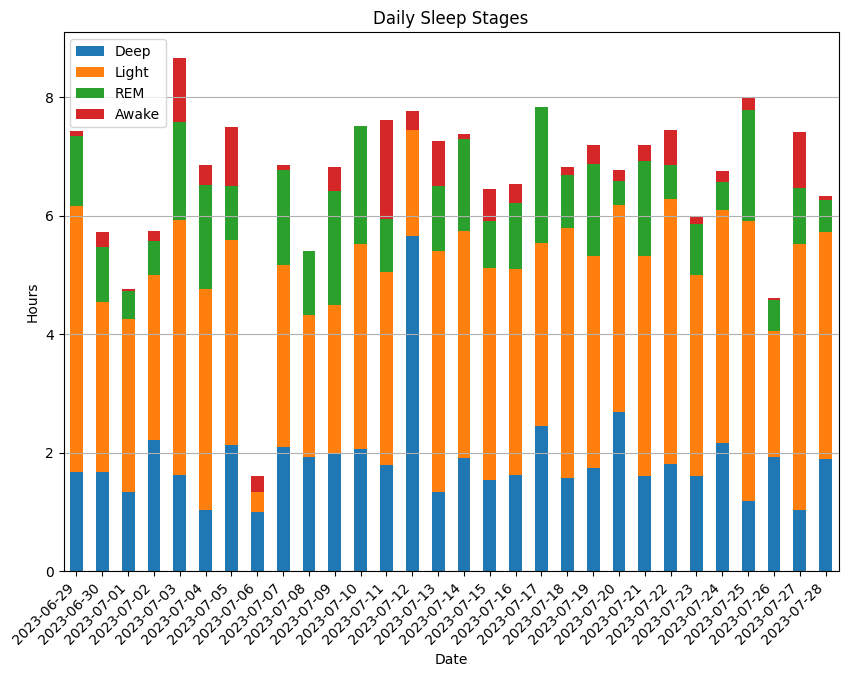

In [11]:
# Convert the relevant sleep time columns from seconds to hours
df["daily_sleep_dto.deep_sleep_hours"] = df["daily_sleep_dto.deep_sleep_seconds"] / 3600
df["daily_sleep_dto.light_sleep_hours"] = df["daily_sleep_dto.light_sleep_seconds"] / 3600
df["daily_sleep_dto.rem_sleep_hours"] = df["daily_sleep_dto.rem_sleep_seconds"] / 3600
df["daily_sleep_dto.awake_sleep_hours"] = df["daily_sleep_dto.awake_sleep_seconds"] / 3600

# Ensure calendar_date is datetime and then sort in ascending order
df["daily_sleep_dto.calendar_date"] = pd.to_datetime(df["daily_sleep_dto.calendar_date"]).dt.date
df.sort_values("daily_sleep_dto.calendar_date", inplace=True)
df.set_index("daily_sleep_dto.calendar_date", inplace=True)

# Rename columns for clarity
df.rename(columns={
    'daily_sleep_dto.deep_sleep_hours': 'Deep',
    'daily_sleep_dto.light_sleep_hours': 'Light',
    'daily_sleep_dto.rem_sleep_hours': 'REM',
    'daily_sleep_dto.awake_sleep_hours': 'Awake'
}, inplace=True)

# Create bar plot
df[['Deep', 'Light', 'REM', 'Awake']].plot(kind='bar', stacked=True, figsize=(10, 7))

plt.ylabel("Hours")
plt.xlabel("Date")
plt.title("Daily Sleep Stages")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()